<a href="https://colab.research.google.com/github/thelastgreykoala/time_series/blob/main/TS_DZ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Импорт и очистка данных

In [135]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv", index_col = 'Month', parse_dates = True)
monthly_car = pd.read_csv("monthly-car-sales-in-quebec-1960.csv", index_col = 'Month', parse_dates = True)

airlines_passengers = pd.read_csv("international-airline-passengers.csv", index_col = 'Month', parse_dates = True)
airlines_passengers.rename(columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60':'Count'}, inplace=True)
airlines_passengers.drop([airlines_passengers.index[len(airlines_passengers)-1]], inplace=True)
airlines_passengers.index = pd.to_datetime(airlines_passengers.index)

In [136]:
airlines_passengers

,Count
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


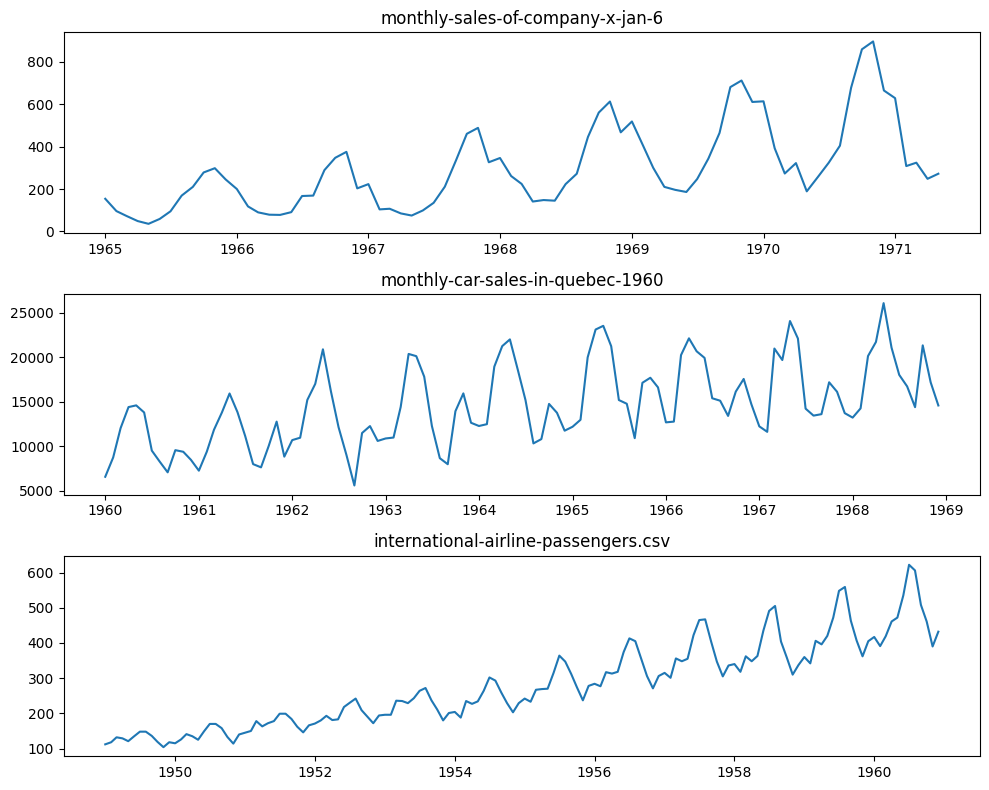

In [137]:
plt.figure(figsize=(10, 8))
plt.subplot(311)
plt.plot(sales_of_company_x)
plt.title('monthly-sales-of-company-x-jan-6')

plt.subplot(312)
plt.plot(monthly_car)
plt.title('monthly-car-sales-in-quebec-1960')

plt.subplot(313)
plt.plot(airlines_passengers)
plt.title('international-airline-passengers.csv')
plt.xlabel('')

plt.tight_layout()
plt.show()

Разложим временной ряд на компоненты.

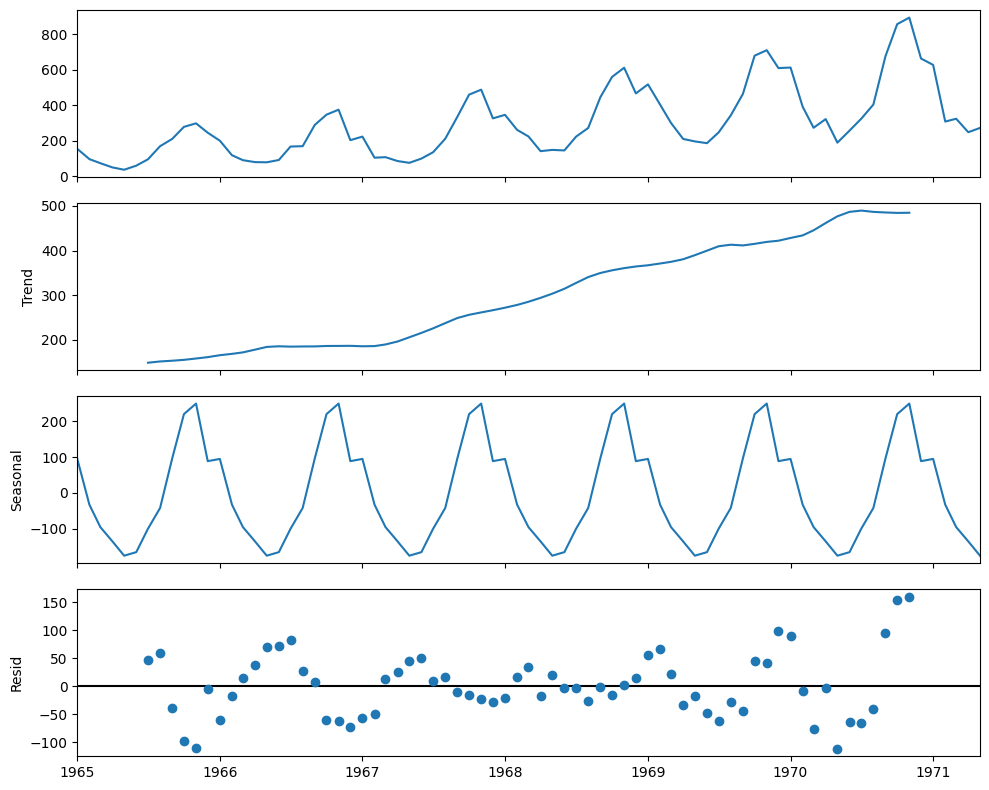

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

decompose = seasonal_decompose(sales_of_company_x)
decompose.plot()

plt.show()

Посмотрим на Автокорреляцию

In [75]:
import statsmodels.tsa.api as smt

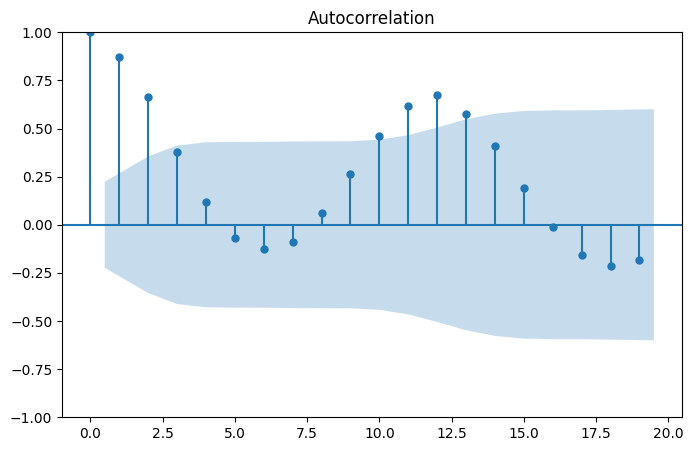

In [84]:
rcParams['figure.figsize'] = 8, 5

smt.graphics.plot_acf(sales_of_company_x['Count'])
plt.show()

Судя по автокорреляции, ряд не стационарный. Посмотрим еще на статистический тест.

Тест Дики-Фуллера

В данном случае гипотезы звучат следующим образом:

* Нулевая гипотеза предполагает, что процесс нестационарный
* Альтернативная гипотеза соответственно говорит об обратном

In [73]:
sales_of_company_x

,Count
Month,
1965-01-01,154
1965-02-01,96
1965-03-01,73
1965-04-01,49
1965-05-01,36
...,...
1971-01-01,628
1971-02-01,308
1971-03-01,324


In [72]:
from statsmodels.tsa.stattools import adfuller

In [74]:
adf_test = adfuller(sales_of_company_x['Count'])

print('p-value = ' + str(adf_test[1]))

p-value = 0.9888894205170052


Вероятность (p-value) для данных о перевозках существенно выше 0,05. Мы не можем отвергнуть нулевую гипотезу. Процесс нестанионарный.

Сделаем его стационарным

Нормализуем дисперсию

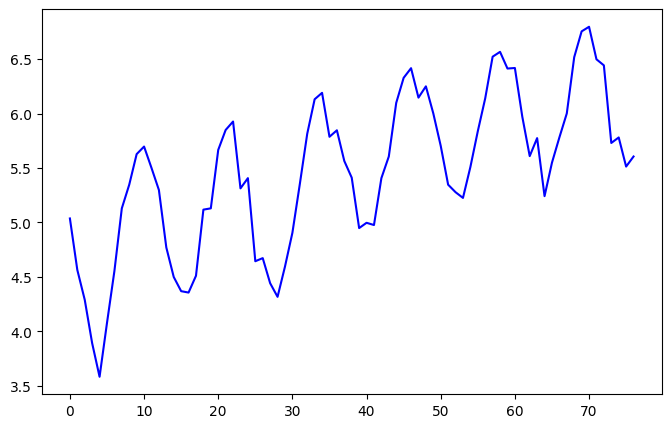

In [92]:
from scipy.stats import boxcox

series = boxcox(sales_of_company_x['Count'], 0)

plt.figure(figsize=(8, 5))
plt.plot(series, color='blue')

Дифференцируем

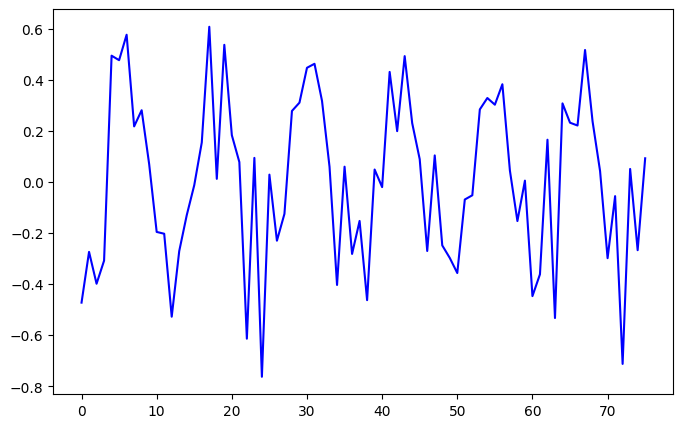

In [93]:
series = np.diff(series, 1)

plt.figure(figsize=(8, 5))
plt.plot(series, color='blue')

In [94]:
adf_test = adfuller(series)

print('p-value = ' + str(adf_test[1]))

p-value = 0.024025392839875176


Результат существенно меньше 5%. Временной ряд стационарен.

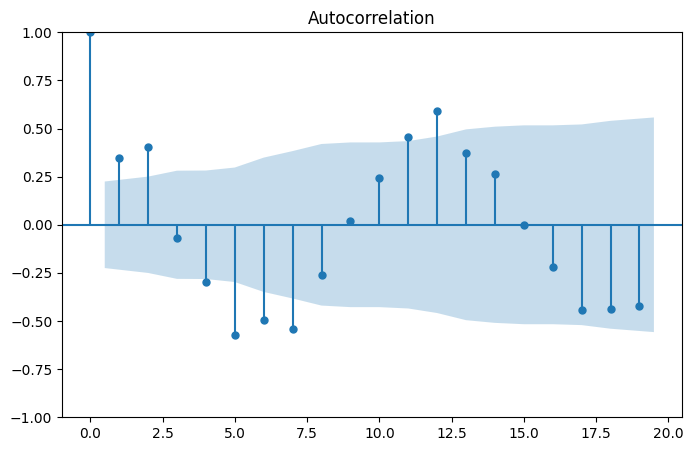

In [95]:
rcParams['figure.figsize'] = 8, 5

smt.graphics.plot_acf(series)
plt.show()



---



То же самое делаем с двумя другими рядами

In [96]:
monthly_car

,Count
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587
...,...
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342


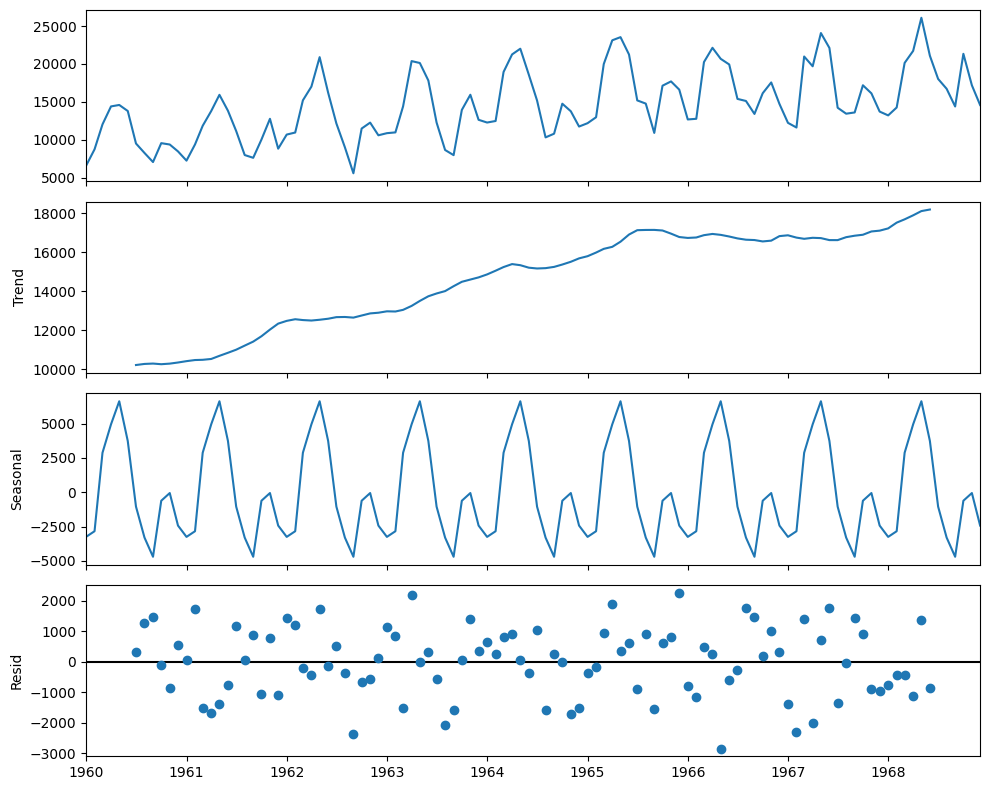

In [120]:
rcParams['figure.figsize'] = 10, 8

decompose = seasonal_decompose(monthly_car)
decompose.plot()

plt.show()

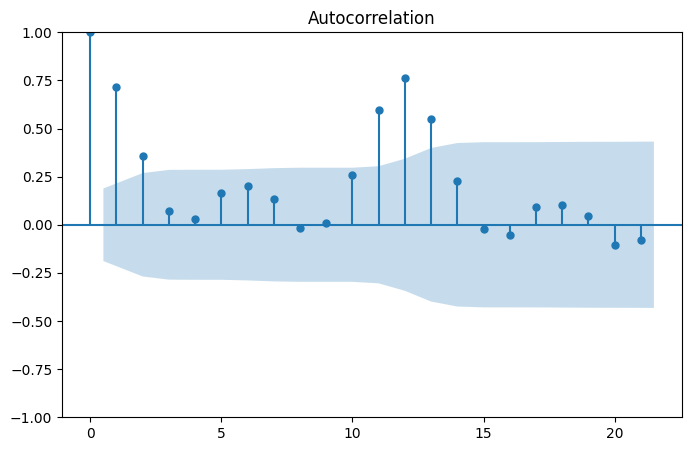

In [97]:
rcParams['figure.figsize'] = 8, 5

smt.graphics.plot_acf(monthly_car['Count'])
plt.show()

Тест Дики-Фуллера

В данном случае гипотезы звучат следующим образом:

* Нулевая гипотеза предполагает, что процесс нестационарный
* Альтернативная гипотеза соответственно говорит об обратном

In [98]:
adf_test = adfuller(monthly_car['Count'])

print('p-value = ' + str(adf_test[1]))

p-value = 0.6632691049832861


Вероятность (p-value) для данных о перевозках существенно выше 0,05. Мы не можем отвергнуть нулевую гипотезу. Процесс нестанионарный.

Сделаем его стационарным

Нормализуем дисперсию

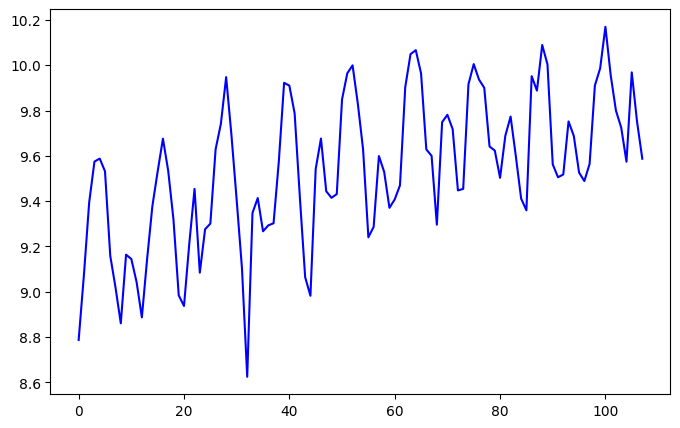

In [99]:
series = boxcox(monthly_car['Count'], 0)

plt.figure(figsize=(8, 5))
plt.plot(series, color='blue')

Дифференцируем

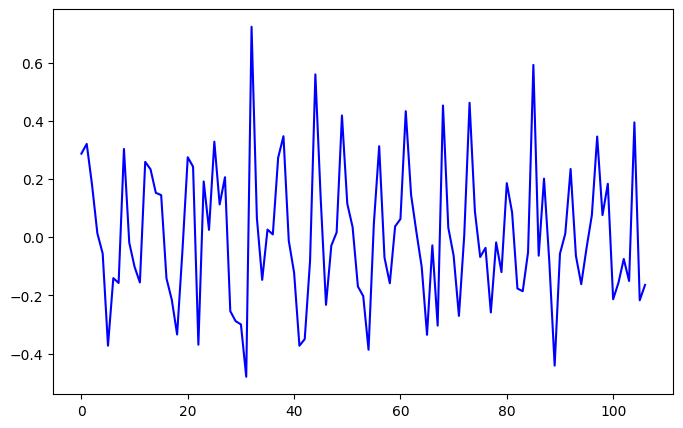

In [100]:
series = np.diff(series, 1)

plt.figure(figsize=(8, 5))
plt.plot(series, color='blue')

In [101]:
adf_test = adfuller(series)

print('p-value = ' + str(adf_test[1]))

p-value = 0.0006749140289813617


Результат существенно меньше 5%. Временной ряд стационарен.

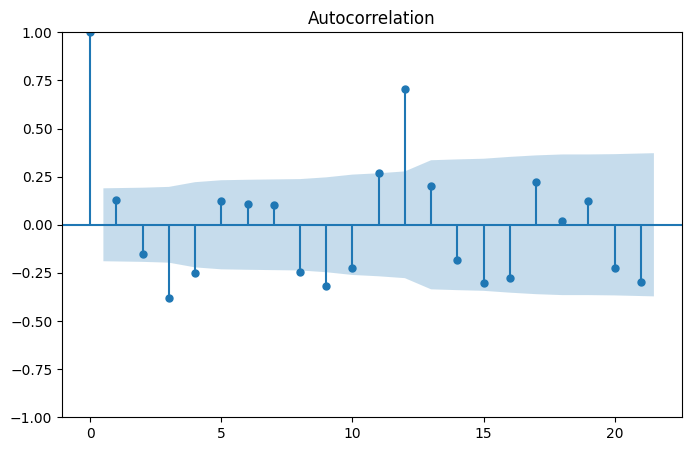

In [102]:
rcParams['figure.figsize'] = 8, 5

smt.graphics.plot_acf(series)
plt.show()



---



In [138]:
airlines_passengers

,Count
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


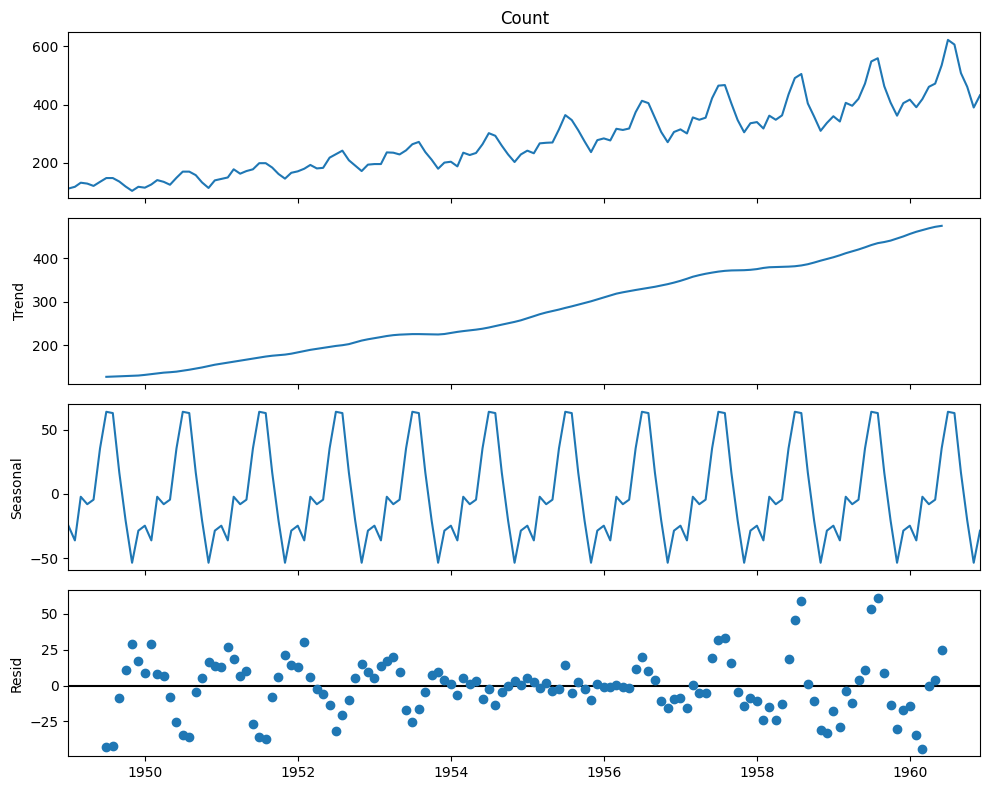

In [139]:
rcParams['figure.figsize'] = 10, 8

decompose = seasonal_decompose(airlines_passengers['Count'])
decompose.plot()

plt.show()

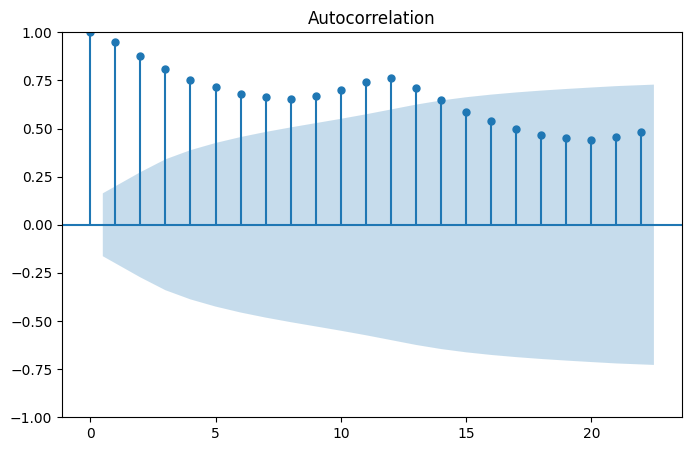

In [140]:
rcParams['figure.figsize'] = 8, 5

smt.graphics.plot_acf(airlines_passengers['Count'])
plt.show()

Тест Дики-Фуллера

В данном случае гипотезы звучат следующим образом:

* Нулевая гипотеза предполагает, что процесс нестационарный
* Альтернативная гипотеза соответственно говорит об обратном

In [141]:
adf_test = adfuller(airlines_passengers['Count'])

print('p-value = ' + str(adf_test[1]))

p-value = 0.991880243437641


Вероятность (p-value) для данных о перевозках существенно выше 0,05. Мы не можем отвергнуть нулевую гипотезу. Процесс нестанионарный.

Сделаем его стационарным

Нормализуем дисперсию

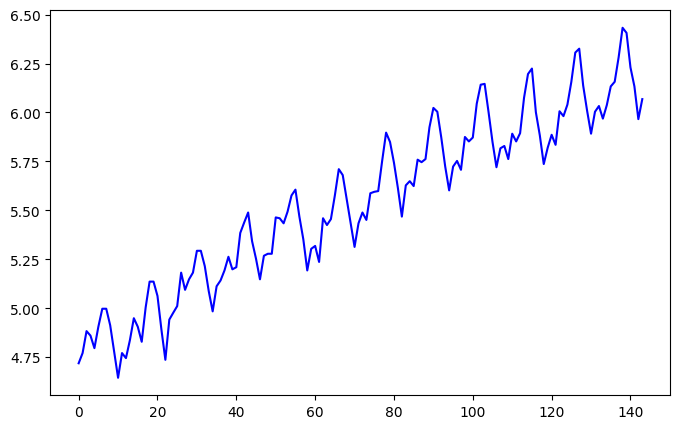

In [142]:
series = boxcox(airlines_passengers['Count'], 0)

plt.figure(figsize=(8, 5))
plt.plot(series, color='blue')

Дифференцируем

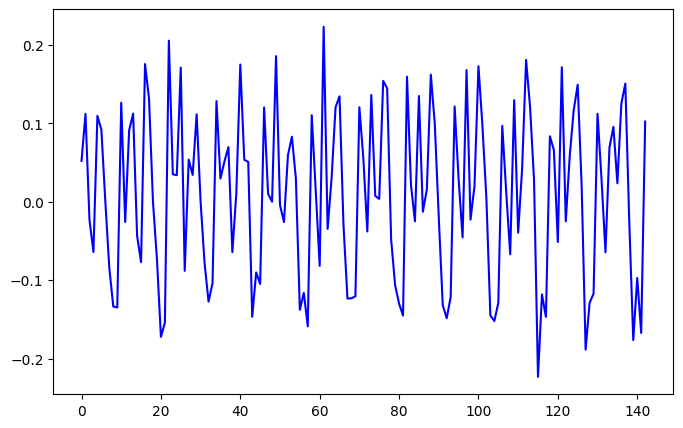

In [143]:
series = np.diff(series, 1)

plt.figure(figsize=(8, 5))
plt.plot(series, color='blue')

In [144]:
adf_test = adfuller(series)

print('p-value = ' + str(adf_test[1]))

p-value = 0.07112054815086184


Результат получился чуть больше 0.05. По формальному признаку мы не можем принять гипотезу о том, что ряд стационарен.

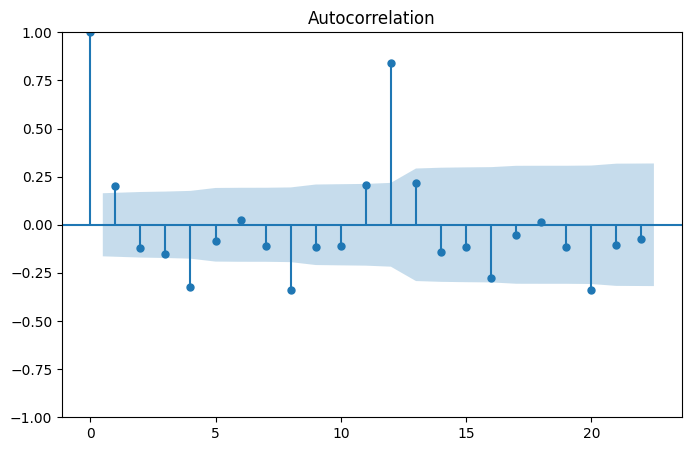

In [145]:
rcParams['figure.figsize'] = 8, 5

smt.graphics.plot_acf(series)
plt.show()

Но судя по автокорреляции, ряд похож на стационарный.